<a href="https://colab.research.google.com/github/aguchhait-stack/NLTK/blob/main/Text_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   review_id                                             review
0          1  The instructions are confusing and hard to fol...
1          2  Great product! Helped me sleep better in just ...
2          3     The package arrived damaged and missing items.
3          4  Customer support was very helpful and resolved...
4          5    I love the taste and the packaging is nice too.
great        0.129538
confusing    0.100000
effective    0.100000
customer     0.100000
day          0.076190
advertise    0.076190
arrive       0.070711
cause        0.070711
damage       0.070711
effect       0.070711
dtype: float64


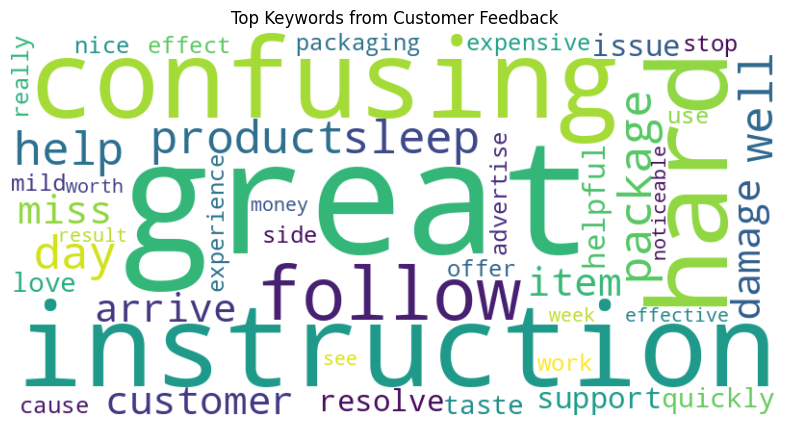

In [20]:
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'https://raw.githubusercontent.com/aguchhait-stack/NLTK/refs/heads/main/customer_reviews.csv')  # fabricated dataset
df.dropna(subset=['review'], inplace=True)
print(df.head())

# Basic cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation
    text = text.lower()
    return text

df['cleaned'] = df['review'].apply(clean_text)

# Tokenization and lemmatization
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    return ' '.join(tokens)

df['lemmatized'] = df['cleaned'].apply(lemmatize)
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the sentiment score
df['sentiment'] = df['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Label it as Positive, Negative, or Neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))
# Create the vectorizer
vectorizer = TfidfVectorizer(max_features=10)

# Fit and transform the text data
X = vectorizer.fit_transform(df['lemmatized'])

# View keywords
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(keywords_df.mean().sort_values(ascending=False))
# Combine all lemmatized reviews into a single string
text = ' '.join(df['lemmatized'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # or 'cool', 'plasma', etc.
    max_words=100
).generate(text)

# Plot it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Keywords from Customer Feedback")
plt.show()



